In [1]:
import pandas as pd

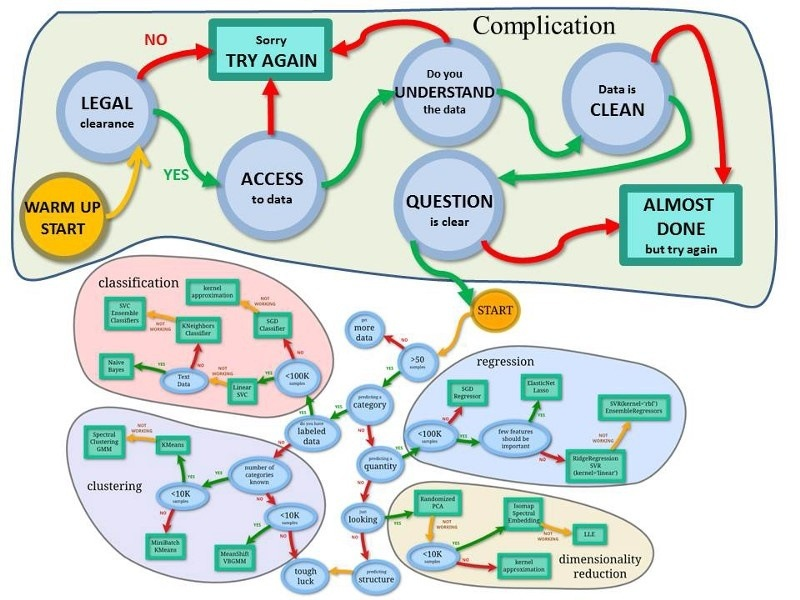

In [32]:
df = pd.read_csv('C:/Users/Haier/Dataset/diamonds/diamonds.csv',index_col=0)

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df['cut'].unique()
# df['cut'].astype('category').cat.codes # can be used when covert a column into label 
df['clarity'].unique()
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
# in order to convert the categorical values into menaingful numerical values we use dictionary 
cut_class_dict = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

clarity_dict = {'I3':1,'I2':2,'I1':3,'SI2':4, 'SI1':5,'VS2':6,'VS1':7, 'VVS2':8, 'VVS1':9,'IF':10}

color_dict = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}

In [36]:
df['cut'] = df['cut'].map(cut_class_dict)

df['clarity'] = df['clarity'].map(clarity_dict)

df['color'] = df['color'].map(color_dict)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


Define a Regression Model

In [44]:
import sklearn as sk
from sklearn import svm,preprocessing

# shuffle sort data

df = sk.utils.shuffle(df)

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
39422,0.41,5,5,7,62.6,55.0,1076,4.77,4.75,2.98
14714,0.30,3,3,8,63.0,56.0,605,4.23,4.28,2.68
51478,0.75,5,4,4,62.5,55.0,2378,5.82,5.77,3.62
46478,0.60,3,7,5,62.0,55.0,1777,5.36,5.44,3.35
19828,1.51,5,2,5,61.2,60.0,8396,7.39,7.37,4.52


Seperate the features and the output 


In [45]:
X = df.drop('price',axis=1).values
X= preprocessing.scale(X)
Y = df['price'].values

In [46]:
X

array([[-0.81842646,  0.98147332,  0.34930404, ..., -0.85683701,
        -0.86201313, -0.79175269],
       [-1.05049061, -0.80969515, -0.8264134 , ..., -1.33822754,
        -1.27352708, -1.21686714],
       [-0.10113725,  0.98147332, -0.23855468, ...,  0.07920014,
         0.03105971,  0.11515815],
       ...,
       [-0.60745904, -0.80969515,  1.52502147, ..., -0.58939782,
        -0.56432218, -0.49417257],
       [-0.8395232 ,  0.98147332,  0.34930404, ..., -0.90141021,
        -0.87076874, -0.83426413],
       [ 0.42628129,  0.08588908,  0.93716275, ...,  0.64973707,
         0.55639668,  0.61112502]])

In [49]:
test_size =200
Y

array([1076,  605, 2378, ..., 1569, 1088, 5544], dtype=int64)

Spliting training and testing dataset 

In [51]:
X_train = X[:-test_size]
y_train = Y[:-test_size]

In [52]:
X_test = X[-test_size:]
y_test = Y[-test_size:]

Define a classifier 

In [53]:
clf = svm.SVR(kernel='linear')
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
import numpy as np

In [57]:
mae = np.sum(clf.predict(X_test)-y_test)/test_size

In [58]:
mae

-404.1789314045741

In [59]:
# how good the prediction is 
clf.score(X_test,y_test) # in terms of cooefficient of determination R^2 error 

0.8749937532179359

In [71]:
# to check predictiom
for X,y in zip(X_test,y_test):
    print(f'Model : {clf.predict([X])[0]}, Actual: {y}')

Model : 979.8878225092403, Actual: 1188
Model : 217.07104942640717, Actual: 732
Model : 2093.3091885284384, Actual: 1684
Model : -52.34770824436737, Actual: 438
Model : 1626.315279638792, Actual: 1129
Model : -542.4894086239938, Actual: 421
Model : 771.0638764076643, Actual: 758
Model : 9677.647923632761, Actual: 10600
Model : 4220.497221644102, Actual: 4030
Model : 4043.742920663146, Actual: 3399
Model : 5520.797197764419, Actual: 7391
Model : 1155.1753248226232, Actual: 1076
Model : 251.48407805675242, Actual: 625
Model : 5827.973948833949, Actual: 5610
Model : 6473.24762440851, Actual: 4657
Model : 2771.1373189439614, Actual: 2345
Model : 12182.905814069827, Actual: 16914
Model : 1976.2538450100435, Actual: 1572
Model : 1353.15527168394, Actual: 1007
Model : 6510.0799827573555, Actual: 7334
Model : -345.063477645444, Actual: 445
Model : 3520.227303946616, Actual: 2947
Model : 4052.4925582112, Actual: 3766
Model : 900.3226203374843, Actual: 1094
Model : 1859.300516825147, Actual: 180

In [70]:
for X,y in zip(X_test,y_test):
    print(clf.predict([X])[0])
    break

979.8878225092403


Train another cassifier 

In [72]:
clf_1 = svm.SVR(kernel='rbf')
clf_1.fit(X_train,y_train)

C:\Rizwan\anaconda3\envs\machine learning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
clf_1.score(X_test,y_test) 

0.6029661391556537

In [74]:
clf_1

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
# to check predictiom
for X,y in zip(X_test,y_test):
    print(f'Model : {clf_1.predict([X])[0]}, Actual: {y}')

Model : 1143.192752376594, Actual: 1188
Model : 699.3599646379785, Actual: 732
Model : 1839.9950970454918, Actual: 1684
Model : 739.6709239848469, Actual: 438
Model : 1310.007964841018, Actual: 1129
Model : 699.8565812219581, Actual: 421
Model : 1111.739709123398, Actual: 758
Model : 7366.578346946577, Actual: 10600
Model : 4288.695999300784, Actual: 4030
Model : 3620.5089869039566, Actual: 3399
Model : 5663.9361740071345, Actual: 7391
Model : 1572.9280321622414, Actual: 1076
Model : 580.0665629179875, Actual: 625
Model : 5463.277707824462, Actual: 5610
Model : 5302.801820433394, Actual: 4657
Model : 2458.416681820201, Actual: 2345
Model : 5637.753426364522, Actual: 16914
Model : 1790.8751705137058, Actual: 1572
Model : 1101.9356099923257, Actual: 1007
Model : 6336.61142614633, Actual: 7334
Model : 904.4931202230787, Actual: 445
Model : 3192.996943466558, Actual: 2947
Model : 3937.2833878037454, Actual: 3766
Model : 979.5731104457118, Actual: 1094
Model : 1723.7947294322141, Actual: 18

In [77]:
help(svm.SVR(kernel='rbf'))

Help on SVR in module sklearn.svm.classes object:

class SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`sklearn.linear_model.LinearSVR` or
 |  :class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be u

In [115]:
mae = np.sum(clf_1.predict(X_test)-y_test)/test_size
print(mae)

-765.1926689996025


Implement XGBoost 

In [78]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [109]:
# XGboost initialisation (For classification problems, you would
# have used the XGBClassifier() class.)
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,
                          learning_rate=0.1,max_depth=10,alpha=10,
                          n_estimators=200)

In [110]:
xg_reg.fit(X_train,y_train)

[22:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [111]:
xg_reg.score(X_test,y_test)

0.9809425551501225

In [112]:
# to check predictiom
for X,y in zip(X_test,y_test):
    print(f'Model : {xg_reg.predict([X])[0]}, Actual: {y}')

Model : 1154.69482421875, Actual: 1188
Model : 634.2673950195312, Actual: 732
Model : 1882.3306884765625, Actual: 1684
Model : 488.0234069824219, Actual: 438
Model : 1210.6968994140625, Actual: 1129
Model : 327.3078918457031, Actual: 421
Model : 773.5534057617188, Actual: 758
Model : 11282.3076171875, Actual: 10600
Model : 3961.776611328125, Actual: 4030
Model : 3211.137939453125, Actual: 3399
Model : 6910.45751953125, Actual: 7391
Model : 1120.6724853515625, Actual: 1076
Model : 727.504150390625, Actual: 625
Model : 5606.92041015625, Actual: 5610
Model : 5037.70703125, Actual: 4657
Model : 2558.79736328125, Actual: 2345
Model : 16654.283203125, Actual: 16914
Model : 1469.47119140625, Actual: 1572
Model : 1063.6622314453125, Actual: 1007
Model : 7507.93408203125, Actual: 7334
Model : 265.5628662109375, Actual: 445
Model : 3318.18896484375, Actual: 2947
Model : 3617.760009765625, Actual: 3766
Model : 944.6114501953125, Actual: 1094
Model : 1878.2548828125, Actual: 1807
Model : 10936.967

In [114]:
mae = np.sum(xg_reg.predict(X_test)-y_test)/test_size
print(mae)

1.1924983215332032


Analysis: As we know that the XGBoost perform best for structural data as in this case we achived the heights value of Rsqr for the XGBoost as compare to other classifiers